In [1]:
import math
from math import factorial as fact
from scipy.special import comb
from itertools import *
import numpy as np
from collections import Counter
import torch
import matplotlib.pyplot as plt

###### Question 12b:

Verify the following identity for $n = 1,2,3,4,5$

###### In Python

In [35]:
# combinatorial identities 
def fn1(n):
    result = 0
    for k in range(n):
        k+=1
        result += comb(n,k)*k**2
        
    return int(result)

fn2 = lambda n: int(2**(n-2)*(n)*(n+1))

In [46]:
for n in range(1,6):
    id1,id2 = fn1(n),fn2(n)
    if id1 == id2:
        print(f'for n={i}: combination 1: {id1} combination 2: {id2}')

for n=5: combination 1: 1 combination 2: 1
for n=5: combination 1: 6 combination 2: 6
for n=5: combination 1: 24 combination 2: 24
for n=5: combination 1: 80 combination 2: 80
for n=5: combination 1: 240 combination 2: 240


###### verification

a) for $n=1, k=1$

$
\begin{align}
 \sum_{k=1}^{n} {n \choose k} k^2 = 2^{n-2}n(n+1)
\end{align}
$

$
\begin{align}
  \implies {1 \choose 1} \cdot 1^2 = 2^{1-2}(1)(1+1)
\end{align}
$

$
\begin{align}
  \implies 1 = 1
\end{align}
$


b) for $n=2, k=1,2$

$
\begin{align}
  \implies {2 \choose 1} \cdot 1^2 + {2 \choose 2} \cdot 2^2 = 6
\end{align}
$

$
\begin{align}
  \implies 2^{2-2}(2)(2+1) = 6
\end{align}
$

$
\begin{align}
  \implies 6 = 6
\end{align}
$

c) for $n=3, k=1,2,3$

$
\begin{align}
  \implies {3 \choose 1} \cdot 1^2 + {3 \choose 2} \cdot 2^2 
   + {3 \choose 3} \cdot 3^2
   = 3^{3-2}(3)(3+1)
\end{align}
$

$
\begin{align}
  \implies 24 = 24
\end{align}
$

c) for $n=4, k=1,2,3,4$

$
\begin{align}
  \implies {4 \choose 1} \cdot 1^2 
   + {4 \choose 2} \cdot 2^2 
   + {4 \choose 3} \cdot 3^2
   + {4 \choose 4} \cdot 4^2
   = 4^{4-2}(4)(4+1)
\end{align}
$

$
\begin{align}
  \implies 80 = 80
\end{align}
$

c) for $n=5, k=1,2,3,4,5$

$
\begin{align}
  \implies {5 \choose 1} \cdot 1^2 
   + {5 \choose 2} \cdot 2^2 
   + {5 \choose 3} \cdot 3^2
   + {5 \choose 4} \cdot 4^2
   + {5 \choose 4} \cdot 5^2
   = 5^{5-2}(5)(5+1)
\end{align}
$

$
\begin{align}
  \implies 240 = 240
\end{align}
$

Combinatorial Proof:

$k$ members (of the committee) can be selected from n people ${n \choose k}$ ways. One chairperson and one secretary can be selected from the committee (both can be the same $n \choose k$$k^2$ ways.

If the chair and the secretary are the same person then they can be $n 2^{n-1}$ because there are two possible states, in the group and out of the group and the exponent represents the total of the group less the chair and secretary. Finally the n value represents the total number of ways this can occur.

A chair person can be selected from a group of $n$ people $n \choose 1$ ways, and a secratary $n-1 \choose 1$ ways, which is the same as saying $n(n-1)$. 

Similar to above the remaining members can be selected $2^{n-2}$ ways. This results in $n(n-1)2^{n-2}$ for secretary and chair as different people.

Finally combining the two scenarios we get: $n 2^{n-1} + n(n-1)2^{n-2}$, which simplifies to $2^{n-2}(n+1)$


#### Chapter 2:

###### Question 30:

a) Rebecca and Elise paired: <br>
-total choices for schools: $8 \choose 4$ and $9 \choose 4$ <br>
-after rebecca and elise are paired off: $7 \choose 3$ and $8 \choose 3$ <br>
-players can be paired: $4!$ and rebecca & elise: $3!$ <br>

$
\begin{align}
  P(R \cap E) = \dfrac{outcomes \hspace{1mm} where \hspace{1mm} 
  rebecca \hspace{1mm} and \hspace{1mm} elise \hspace{1mm} paired}{outcomes}
\end{align}
$

$
\begin{align}
  P(R \cap E) = \dfrac{{7 \choose 3} {8 \choose 3}3!}{{8 \choose 4} {9 \choose 4}4!}
  = \dfrac{1}{18}
\end{align}
$

###### *calculations using python

In [54]:
total_choices = comb(8,4)*comb(9,4)
rebecca, elise = comb(7,3), comb(8,3)

In [61]:
# 0.05555 = 1/18

(math.factorial(3)*rebecca*elise)/(total_choices*math.factorial(4))

0.05555555555555555

b) Rebecca and Elise will not play eachother (not paired): <br>
This time subtract off the number of ways rebecca and elise are paird $3!$ and everyone is paired $4!$

$
\begin{align}
  P(R \cap E) = \dfrac{{7 \choose 3} {8 \choose 3}}{{8 \choose 4} {9 \choose 4}} \cdot
  1 - \dfrac{3!}{4!}
  = \dfrac{1}{6}
\end{align}
$

In [63]:
# part b calculation

(rebecca*elise)/(total_choices)*(1 - (math.factorial(3)/math.factorial(4)))

0.16666666666666666

c) either rebecca or elise
-start by calculating R and not E and E and not R, then add these two probabilities together

$
\begin{align}
  P(R \cap E^c) = \dfrac{{7 \choose 3} }{{8 \choose 4} } \cdot
  1 - \dfrac{{8 \choose 3}}{{9 \choose 4}}
  = \dfrac{5}{18}
\end{align}
$

$
\begin{align}
  P(R^c \cap E) = 1 - \dfrac{{7 \choose 3} }{{8 \choose 4} } \cdot
  \dfrac{{8 \choose 3}}{{9 \choose 4}}
  = \dfrac{4}{18}
\end{align}
$

$
\begin{align}
  P(R \cap E^c) + P(R^c \cap E) = \dfrac{5}{18} + \dfrac{4}{18}
  = \dfrac{1}{2} 
\end{align}
$

In [70]:
r_not_e = (comb(7,3)/comb(8,4))*(1-((comb(8,3)/comb(9,4))))
e_not_r = (1-(comb(7,3)/comb(8,4)))*((comb(8,3)/comb(9,4)))

r_not_e + e_not_r

0.5

##### Question T15

An urn contains $M$ white and $N$ black balls. If a random sample size of $r$ is chosen, what is the probability that it contains $k$ white balls?

-If $S$ is the sample space containing all possible choices or $r$, there are $M + N$ choices in $S$. <br>
-$S$ consists of ${M+N \choose r}$ total possibilities <br>
-Since every outcome is equally likely: $P(E) = \dfrac{E}{S}$ <br>
-Since $M$ represents combinations of white balls, the event $k$ white balls are drawn is represented by $N \choose k$ <br>
-Also $N$ represents combinations of black balls: $M \choose r-k $. $r$ is calculated for black balls by subtracting off $k$ balls chosen in previous statement <br>
-$E$ = ${M \choose k} {N \choose r-k}$ <br>
-Finally the probability of choosing $r$ balls from $M$ white and $N$ black is: <br>
$P(E) = \dfrac{{M \choose k} {N \choose r-k}}{{M+N \choose r}}$

##### Question 3: 

Consider flipping two fair m-sided dice and the random variable $X$ represents the sum of the 2 numbers you get. In this case the probability mass function for $X$ is:

$
\begin{align}
  p(x) = \dfrac{m - |x - (m+1)|}{m^2}
  , x = 2,...,2m
\end{align}
$

Show/disprove $p(x)$ is a valid pmf and that $E(X) = m + 1, Var(X) = \dfrac{m^2-1}{2m}$

To show $p(x)$ is a valid pmf we must show that 

1) it is non-negative<br>
-We can see for any value $\geq 2$ that the equation will always be non-negative <br>
So the pmf satisfies this first requirement


2) it sums to 1 for all values of $x$

If we divide the pmf up into two parts:<br>
${2,3,4,5,6,7}$ and ${8,9,10,11,12}$ we can represent the function like so:<br>

$
\begin{align}
 \sum_{x=2}^{m+1} \dfrac{m + x - m - 1}{m^2} + \sum_{m+2}^{2m} \dfrac{m - x + m + 1}{m^2}
 = 1
\end{align}
$

Then you can see that:

$
\begin{align}
  2(\dfrac{1}{m^2} + \dfrac{2}{m^2} + \dfrac{3}{m^2} +
  \dfrac{4}{m^2} + \dfrac{5}{m^2}) + \dfrac{6}{m^2} = 1
\end{align}
$

This can reduce to:

$
\begin{align}
  \dfrac{36}{m^2}= 1
\end{align}
$

And we can see that 36 = $m^2$ if $m$=6, and that $\dfrac{m^2}{m^2} = 1$

Thus all values sum to 1.

More generally we can see that: 

$
\begin{align}
  2(\dfrac{[1 + 2 +,...,+ m-1]}{m^2}) + \dfrac{m}{m^2} = 1
\end{align}
$

The left term can be describe using a sequence, while we can reduce $m/m^2$ like so:

$
\begin{align}
  \dfrac{2m(m-1)}{2m^2} + \dfrac{1}{m} = 1
\end{align}
$

You can then reduce the fraction:

$
\begin{align}
  \dfrac{m-1}{m} + \dfrac{1}{m} = 1
\end{align}
$

You can then reduce it to show it equals 1:

$
\begin{align}
  \dfrac{1}{m} + \dfrac{m}{m} - \dfrac{1}{m} = 1
\end{align}
$

$
\begin{align}
  \dfrac{m}{m} = 1
\end{align}
$


For $E(X)$:

$
\begin{align}
  \sum(x) \cdot p(x)
\end{align}
$

sum([2,3,4,5,6,7,8,9,10,11,12]) * 2([1/36, 2/26/, 3/36, 4/36, 5/36, 6/36]) = 7

This is $m + 1$ if m = 6 and there are two die

For $Var(X)$:

Variance= $[E(x^2) - {E(x)}^2]$= 54.83 - 49 = 5.83




Also this can be shown by calculating the pmf for arbitrary values of m as shown below in the code. 

For example if we take our original pmf function and input $m$ = 6 (a six sided die) we can plug it into our function below and iterate through all $X$, which are the random values of the sum of two 6-sided die in this case. When we sum up all of the values when inputting 2,3,4...12 we get 1, which confirms that this is a valid pmf for two six sided die. We can do the same for any arbitrary value of $m$. We have shown below that this can be done for $m$ = 6,10, and 21

In [67]:
# x represents sum of numbers you get
# m is sides of dice 

def pmf(x,m):
    p_x = (m - abs(x-(m+1)))/m**2
    return p_x

def output_pmf(m):
    x = m*2
    P = []

    for i in range(2,(x+1)):
        P.append(pmf(i,x/2))
        
    return P

In [69]:
sum(output_pmf(6))

1.0000000000000002

In [70]:
sum(output_pmf(10))

1.0000000000000002

In [72]:
sum(output_pmf(21))

1.0

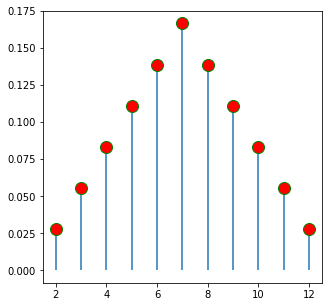

In [126]:
p_x = output_pmf(6)
die = list(range(1,7))
dice_sum = [np.sum(i) for i in [x for x in product(die,repeat=2)]]
dice_outcome = dict(Counter(dice_sum))
cumulative_probs = np.cumsum(p_x)

plt.figure(figsize=(5,5))
plt.plot(list(dice_outcome), p_x, 'ro', ms=12, mec='g')
plt.vlines(list(dice_outcome),0,p_x)
plt.show()

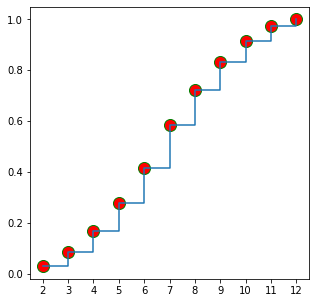

In [127]:
plt.figure(figsize=(5,5))
plt.plot(list(dice_outcome), cumulative_probs, 'ro', ms=12, mec='g')
plt.step(list(dice_outcome),cumulative_probs, where='post')
plt.xticks(list(dice_outcome))
plt.show()

In [130]:
expected_value = np.sum(np.multiply(list(dice_outcome),p_x))
expected_value

6.999999999999998

In [131]:
np.var(dice_sum)

5.833333333333333

##### Question 4

$E(X)$ and $Var(X)$ as $m$ goes to infinity:

$E(X)$ will be the average of sums of dice as $m$ approaches infinity, and it will increase because the value of sides on the die will increase.

$Var(X)$ will increase 

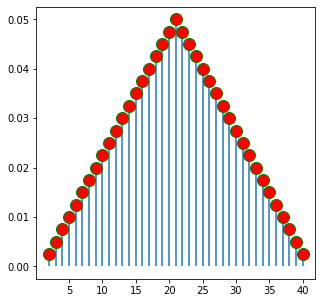

In [133]:
p_x = output_pmf(20)
die = list(range(1,21))
dice_sum = [np.sum(i) for i in [x for x in product(die,repeat=2)]]
dice_outcome = dict(Counter(dice_sum))
cumulative_probs = np.cumsum(p_x)

plt.figure(figsize=(5,5))
plt.plot(list(dice_outcome), p_x, 'ro', ms=12, mec='g')
plt.vlines(list(dice_outcome),0,p_x)
plt.show()

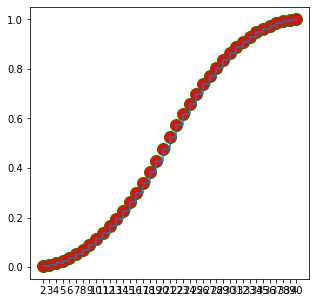

In [134]:
plt.figure(figsize=(5,5))
plt.plot(list(dice_outcome), cumulative_probs, 'ro', ms=12, mec='g')
plt.step(list(dice_outcome),cumulative_probs, where='post')
plt.xticks(list(dice_outcome))
plt.show()

In [135]:
expected_value = np.sum(np.multiply(list(dice_outcome),p_x))
print(expected_value)
print(np.var(dice_sum))

21.0
66.5
